# Load Data

In [1]:
import pandas as pd
import os 
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Combining all the years together 
# data came from here - https://pge-energydatarequest.com/public_datasets/download?type=electric&file=PGE_2021_Q4_ElectricUsageByZip.zip
# Create an empty list to store the dataframes
current_dir = 'Raw Data'
df_list = []

# Loop through each CSV file in the directory
for filename in os.listdir(current_dir):
    if filename.endswith('.csv'):
        # Read the CSV file and append it to the list of dataframes
        file_path = os.path.join(current_dir, filename)
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.lower()
        #df['Quarter']=filename[9:11]
        df_list.append(df)

# Concatenate all dataframes in the list into a single dataframe
df_years = pd.concat(df_list, ignore_index=True)

# Data Exploration & Cleaning

In [3]:
df_years

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
0,93202,1,2013,Elec- Agricultural,Y,0,0,NaN
1,93202,2,2013,Elec- Agricultural,Y,0,0,NaN
2,93202,3,2013,Elec- Agricultural,Y,0,0,NaN
3,93203,1,2013,Elec- Agricultural,Y,0,0,NaN
4,93203,2,2013,Elec- Agricultural,Y,0,0,NaN
...,...,...,...,...,...,...,...,...
304596,96137,11,2021,Elec- Residential,N,"2,790","973,018",349
304597,96137,12,2021,Elec- Residential,N,"2,788","1,099,806",394
304598,96162,10,2021,Elec- Residential,Y,0,0,NaN
304599,96162,11,2021,Elec- Residential,Y,0,0,NaN


In [4]:
df_years.columns

Index(['zipcode', 'month', 'year', 'customerclass', 'combined',
       'totalcustomers', 'totalkwh', 'averagekwh'],
      dtype='object')

In [5]:
df_years.info() 
# some columns like total customers are not integer or float types we'll need to fix this

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304601 entries, 0 to 304600
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   zipcode         304601 non-null  int64 
 1   month           304601 non-null  int64 
 2   year            304601 non-null  int64 
 3   customerclass   304601 non-null  object
 4   combined        304601 non-null  object
 5   totalcustomers  304601 non-null  object
 6   totalkwh        304601 non-null  object
 7   averagekwh      139063 non-null  object
dtypes: int64(3), object(5)
memory usage: 18.6+ MB


In [6]:
df_years['totalcustomers']=df_years['totalcustomers'].str.replace(',','')
df_years['totalkwh']=df_years['totalkwh'].str.replace(',','')
df_years['averagekwh']=df_years['averagekwh'].str.replace(',','')

In [7]:
df_years['totalcustomers']=df_years['totalcustomers'].astype(int)
df_years['totalkwh']=df_years['totalkwh'].astype(float)
df_years['averagekwh']=df_years['averagekwh'].astype(float)

In [8]:
df_years.describe()

,zipcode,month,year,totalcustomers,totalkwh,averagekwh
count,304601.000000,304601.000000,304601.000000,304601.000000,3.046010e+05,1.390630e+05
mean,94817.370557,6.486482,2016.757896,1848.833261,2.490787e+06,1.030951e+04
std,870.311871,3.476309,2.615935,4293.595731,1.390591e+07,9.644375e+04
min,92356.000000,1.000000,2013.000000,0.000000,0.000000e+00,1.100000e+01
25%,94041.000000,3.000000,2014.000000,0.000000,0.000000e+00,5.080000e+02
50%,95039.000000,6.000000,2017.000000,0.000000,0.000000e+00,7.390000e+02
75%,95528.000000,10.000000,2019.000000,951.000000,2.030188e+06,4.203000e+03
max,96162.000000,12.000000,2021.000000,110585.000000,1.250439e+09,2.371711e+06


In [9]:
df_years['combined'].value_counts(normalize=True)*100 # 65% of our data belongs to combines zip codes

Y    65.79591
N    34.20409
Name: combined, dtype: float64

In [10]:
df_years.duplicated().any() #determine duplicates

True

In [11]:
df_years.duplicated().sum() # we have 14863 duplicates 

14863

In [12]:
df_years[df_years.duplicated(keep=False)].sort_values(by=['zipcode','month','year']) # lets see these duplicates ourselves

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
32096,93101,1,2014,Elec- Commercial,Y,0,0.0,NaN
35470,93101,1,2014,Elec- Residential,Y,0,0.0,NaN
53393,93101,1,2014,Elec- Commercial,Y,0,0.0,NaN
53394,93101,1,2014,Elec- Residential,Y,0,0.0,NaN
32097,93101,2,2014,Elec- Commercial,Y,0,0.0,NaN
...,...,...,...,...,...,...,...,...
50832,96161,11,2013,Elec- Residential,Y,0,0.0,NaN
26877,96161,12,2013,Elec- Commercial,Y,0,0.0,NaN
30358,96161,12,2013,Elec- Residential,Y,0,0.0,NaN
53391,96161,12,2013,Elec- Commercial,Y,0,0.0,NaN


In [13]:
df_years=df_years.drop_duplicates()

In [14]:
df_years

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
0,93202,1,2013,Elec- Agricultural,Y,0,0.0,NaN
1,93202,2,2013,Elec- Agricultural,Y,0,0.0,NaN
2,93202,3,2013,Elec- Agricultural,Y,0,0.0,NaN
3,93203,1,2013,Elec- Agricultural,Y,0,0.0,NaN
4,93203,2,2013,Elec- Agricultural,Y,0,0.0,NaN
...,...,...,...,...,...,...,...,...
304596,96137,11,2021,Elec- Residential,N,2790,973018.0,349.0
304597,96137,12,2021,Elec- Residential,N,2788,1099806.0,394.0
304598,96162,10,2021,Elec- Residential,Y,0,0.0,NaN
304599,96162,11,2021,Elec- Residential,Y,0,0.0,NaN


In [15]:
df_years['customerclass'].value_counts() # we have 4 classess of customers

Elec- Residential     98990
Elec- Commercial      92815
Elec- Agricultural    65264
Elec- Industrial      32669
Name: customerclass, dtype: int64

In [16]:
#lets randomly check data consistency 
df_years[(df_years['zipcode']==94538) & (df_years['year']==2014)]['month'].value_counts()
# we see that in 2014 we have 6 observations per month which is not what we expected 
# since we only have 4 types of customers

1     6
2     6
3     6
4     6
5     6
6     6
7     4
8     4
9     4
10    4
11    4
12    4
Name: month, dtype: int64

In [17]:
#lets look closer
df_years[(df_years['zipcode']==94538) & (df_years['year']==2014)].sort_values(by=['customerclass','combined','month'])
# we see that for some zipcodes some months are repeated but with different number of total customers
# since we don't expect one zipcode to appear in the data several times per month 
# we should drop these duplicates 

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
30951,94538,1,2014,Elec- Agricultural,Y,0,0.0,NaN
30952,94538,2,2014,Elec- Agricultural,Y,0,0.0,NaN
30953,94538,3,2014,Elec- Agricultural,Y,0,0.0,NaN
38635,94538,4,2014,Elec- Agricultural,Y,0,0.0,NaN
38636,94538,5,2014,Elec- Agricultural,Y,0,0.0,NaN
38637,94538,6,2014,Elec- Agricultural,Y,0,0.0,NaN
69629,94538,7,2014,Elec- Agricultural,Y,0,0.0,NaN
72194,94538,8,2014,Elec- Agricultural,Y,0,0.0,NaN
74759,94538,9,2014,Elec- Agricultural,Y,0,0.0,NaN
77323,94538,10,2014,Elec- Agricultural,Y,0,0.0,NaN


In [18]:
df_years[df_years.duplicated(subset=['zipcode', 'combined','month','year','customerclass','totalcustomers'], keep=False)].sort_values(by=['zipcode','month','year'])
# these are our near duplicates

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
167005,93201,9,2017,Elec- Residential,N,303,215400.0,711.0
176600,93201,9,2017,Elec- Residential,N,303,215127.0,710.0
163569,93203,9,2017,Elec- Commercial,Y,459,5049264.0,11001.0
172020,93203,9,2017,Elec- Commercial,Y,459,5189677.0,11306.0
167011,93204,9,2017,Elec- Residential,N,2319,1546072.0,667.0
...,...,...,...,...,...,...,...,...
58509,96137,2,2014,Elec- Residential,N,2665,789811.0,296.0
38038,96137,3,2014,Elec- Residential,N,2667,817106.0,306.0
61069,96137,3,2014,Elec- Residential,N,2667,816794.0,306.0
30355,96137,12,2013,Elec- Residential,N,2658,1095961.0,412.0


In [19]:
len(df_years[df_years.duplicated(subset=['zipcode', 'combined','month','year','customerclass','totalcustomers'])])
# we have 1520 such near duplicates 


1520

In [20]:
df_years=df_years.drop_duplicates(subset=['zipcode', 'combined','month','year','customerclass','totalcustomers'], keep='first')
# lets keep the first occurence 
#later we can play with what happens if we keep the secon occurence
# or create a measure which keeps the average of totalkwh and averagekwh  across all occurences

In [21]:
len(df_years[(df_years['totalcustomers']==0) & (df_years['totalkwh']==0)& (df_years['averagekwh'].isnull())])
# We also have some lines with all 0s in total customers, total kilowatt per hour and 
# missing average kilo watt per hour 
# this may indicate zip codes where PGE does not have any customers / no coverage 
# Since these observations does not add any info except the zipcodes themselves we could drop them 

152392

In [22]:
mask=(df_years['totalcustomers']==0) & (df_years['totalkwh']==0) & (df_years['averagekwh'].isnull())
# filtering for these observations 

df_years=df_years[~mask] # excluding these observations from our dataset

In [23]:
len(df_years[df_years.duplicated(subset=['zipcode', 'combined','month','year','customerclass'])])
# lets check for other duplicates based on 'zipcode', 'combined','month','year','customerclass' only - we have 7777 of them

7777

In [24]:
df_years[df_years.duplicated(subset=['zipcode', 'combined','month','year','customerclass'],keep=False)].sort_values(by=['zipcode','month','year'])

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
35488,93203,1,2014,Elec- Residential,Y,4450,1972035.0,443.0
53407,93203,1,2014,Elec- Residential,Y,4449,1971727.0,443.0
35489,93203,2,2014,Elec- Residential,Y,4454,1580720.0,355.0
55967,93203,2,2014,Elec- Residential,Y,4453,1580431.0,355.0
30364,93203,3,2014,Elec- Agricultural,Y,132,7427724.0,56271.0
...,...,...,...,...,...,...,...,...
180018,96137,9,2017,Elec- Residential,N,2719,994598.0,366.0
30353,96137,10,2013,Elec- Residential,N,2654,926121.0,349.0
48279,96137,10,2013,Elec- Residential,N,2652,925766.0,349.0
30354,96137,11,2013,Elec- Residential,N,2655,901315.0,339.0


In [25]:
df_years=df_years.drop_duplicates(subset=['zipcode', 'combined','month','year','customerclass'], keep='first')
# lets drop these duplicates too and keep the firts occurence

In [26]:
df_years[(df_years['zipcode']==94538) & (df_years['year']==2014)].sort_values(by=['customerclass','combined','month'])
# now the data looks good 

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
32911,94538,1,2014,Elec- Commercial,N,2540,39954548.0,15730.0
32912,94538,2,2014,Elec- Commercial,N,2542,35842860.0,14100.0
32913,94538,3,2014,Elec- Commercial,N,2543,39660634.0,15596.0
40604,94538,4,2014,Elec- Commercial,N,2546,39196686.0,15395.0
40605,94538,5,2014,Elec- Commercial,N,2552,41278680.0,16175.0
40606,94538,6,2014,Elec- Commercial,N,2558,41212795.0,16111.0
69630,94538,7,2014,Elec- Commercial,N,2544,43554210.0,17120.0
72195,94538,8,2014,Elec- Commercial,N,2543,43274069.0,17017.0
74760,94538,9,2014,Elec- Commercial,N,2543,42139942.0,16571.0
77324,94538,10,2014,Elec- Commercial,N,2544,42213552.0,16593.0


In [27]:
df_years[(df_years['customerclass']=='Elec- Commercial') & (df_years['year']==2013)& (df_years['zipcode']==94538) ]['month'].value_counts()
# keep checking the data 
# this looks good as we have one observation for this zip code per commercial customer class 

1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
Name: month, dtype: int64

In [28]:
df_years[(df_years['customerclass']=='Elec- Residential') & (df_years['year']==2014)& (df_years['zipcode']==93203) ]['month'].value_counts()


1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
Name: month, dtype: int64

In [29]:
df_years['customerclass'].value_counts() # we still have 4 classess of customers but not so many industrial and agricultural

Elec- Residential     84016
Elec- Commercial      35755
Elec- Agricultural     7521
Elec- Industrial        757
Name: customerclass, dtype: int64

In [30]:
df_years['customerclass'].unique()

array(['Elec- Agricultural', 'Elec- Commercial', 'Elec- Industrial',
       'Elec- Residential'], dtype=object)

In [31]:
df_years['zipcode'].nunique() # we have 827 zip codes here


827

In [32]:
ohe = pd.get_dummies(df_years['customerclass'], drop_first=True) # we create 3 dummies for further analysis

In [33]:
# Drops categorical variables from the df
#df_years = df_years.drop('customerclass', axis = 1) # lets not drop the initial avriable just for now

# Adds the newly created dummy variables instead
df_years = pd.concat([df_years, ohe], axis = 1) 

In [34]:
df_years

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh,Elec- Commercial,Elec- Industrial,Elec- Residential
10,93206,2,2013,Elec- Agricultural,Y,138,7249627.0,52534.0,0,0,0
11,93206,3,2013,Elec- Agricultural,Y,371,20354832.0,54865.0,0,0,0
16,93212,2,2013,Elec- Agricultural,Y,213,9971956.0,46817.0,0,0,0
28,93230,2,2013,Elec- Agricultural,Y,244,3942702.0,16159.0,0,0,0
46,93245,2,2013,Elec- Agricultural,N,334,1008626.0,3020.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
304593,96125,11,2021,Elec- Residential,N,441,99843.0,226.0,0,0,1
304594,96125,12,2021,Elec- Residential,N,441,103069.0,234.0,0,0,1
304595,96137,10,2021,Elec- Residential,N,2791,972348.0,348.0,0,0,1
304596,96137,11,2021,Elec- Residential,N,2790,973018.0,349.0,0,0,1


In [35]:
#determine if there is missing values
df_years.isna().any()

zipcode              False
month                False
year                 False
customerclass        False
combined             False
totalcustomers       False
totalkwh             False
averagekwh           False
Elec- Commercial     False
Elec- Industrial     False
Elec- Residential    False
dtype: bool

In [36]:
df_years

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh,Elec- Commercial,Elec- Industrial,Elec- Residential
10,93206,2,2013,Elec- Agricultural,Y,138,7249627.0,52534.0,0,0,0
11,93206,3,2013,Elec- Agricultural,Y,371,20354832.0,54865.0,0,0,0
16,93212,2,2013,Elec- Agricultural,Y,213,9971956.0,46817.0,0,0,0
28,93230,2,2013,Elec- Agricultural,Y,244,3942702.0,16159.0,0,0,0
46,93245,2,2013,Elec- Agricultural,N,334,1008626.0,3020.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
304593,96125,11,2021,Elec- Residential,N,441,99843.0,226.0,0,0,1
304594,96125,12,2021,Elec- Residential,N,441,103069.0,234.0,0,0,1
304595,96137,10,2021,Elec- Residential,N,2791,972348.0,348.0,0,0,1
304596,96137,11,2021,Elec- Residential,N,2790,973018.0,349.0,0,0,1


# Data Visualization 

In [45]:
def viz(customer_class, parameter, year=None):
    """
    Visualize the distribution of a parameter for a given customer class and year (optional).

    Parameters:
        customer_class (str): The customer class to visualize (e.g., 'Elec-Residential', 'Elec-Commercial').
        parameter (str): The parameter to plot the distribution for.
        year (int, optional): The year to plot the distribution for. If not specified, plots all years.

    Returns:
        None
    """  
    df=df_years[df_years['customerclass']==customer_class]
    unique_years = df['year'].unique()

    # Set the seaborn style
    sns.set(style='whitegrid')
    
    if year is not None:
        df=df[df['year']==year]
        unique_years=[year]

    # Create a separate histogram for each year
    for year in unique_years:
        # Filter the DataFrame for the current year
        df_year = df[df['year'] == year]

        # Create a FacetGrid for the current year
        g = sns.FacetGrid(df_year, row='customerclass', height=3, aspect=3,sharex=False, sharey=False)
        g.map(sns.histplot, parameter, bins=200)

        # Set axis labels
        g.set_axis_labels(parameter, 'Count')

        for ax in g.axes.flat: # setting x and y to intersect at 0
            ax.set_xlim(left=0)
            ax.set_ylim(bottom=0)
        g.set_axis_labels(parameter, 'Count')

        for ax, customer_class in zip(g.axes.flat, g.row_names):
        # Extract part of the customer_class starting from index 6
            customer_class = customer_class[6:]
      
        for ax, title in zip(g.axes.flat, g.row_names):
            ax.set_title(f"Distribution of {customer_class} customers {parameter}: {year} year")
        plt.show()

In [ ]:
#def viz_med(parameter,year=None):
    grouped_data = df_years.groupby(['year', 'customerclass'])[parameter].median().reset_index()
    # Set the seaborn style
    sns.set(style='whitegrid')
    labels=['Residential', 'Commercial', 'Agricultural', 'Industrial']
    color_palette = sns.color_palette("flare", len(grouped_data['year'].unique()))

    # Plot the bar chart
    ax = sns.barplot(x='customerclass', y=parameter, hue='year', palette=color_palette,data=grouped_data,order=['Elec- Residential','Elec- Commercial','Elec- Agricultural',  'Elec- Industrial'])

    ax.set_xticklabels(labels)

    # Add labels and title
    plt.xlabel('Customer Class')
    plt.ylabel(f'Median Number of {parameter}')
    plt.title(f'Annual Median Number of {parameter} per Customer Class')

    plt.show()

In [ ]:
def viz_med(parameter,year=None):
    if year: # if year is given
        grouped_data = df_years[df_years['year'] == year].groupby(['year', 'customerclass'])[parameter].median().reset_index()
        title = f'Median Number of {parameter} per Customer Class for {year}'
    else:
        grouped_data = df_years.groupby(['year', 'customerclass'])[parameter].median().reset_index()
        title = f'Annual Median Number of {parameter} per Customer Class'
    # Set the seaborn style
    sns.set(style='whitegrid')
    labels=['Residential', 'Commercial', 'Agricultural', 'Industrial']
    color_palette = sns.color_palette("flare", len(grouped_data['year'].unique()))

    # Plot the bar chart
    ax = sns.barplot(x='customerclass', y=parameter, hue='year', palette=color_palette,data=grouped_data,order=['Elec- Residential','Elec- Commercial','Elec- Agricultural',  'Elec- Industrial'])

    ax.set_xticklabels(labels)

    # Add labels and title
    plt.xlabel('Customer Class')
    plt.ylabel(f'Median Number of {parameter}')
    plt.title(title)

    plt.show()

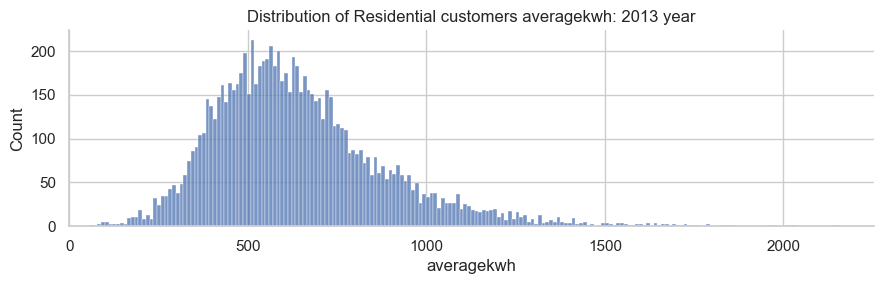

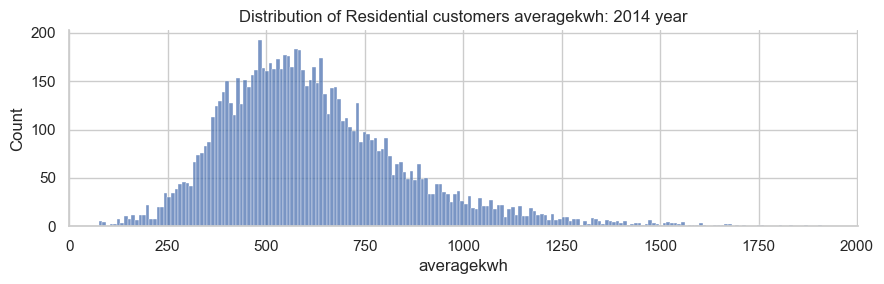

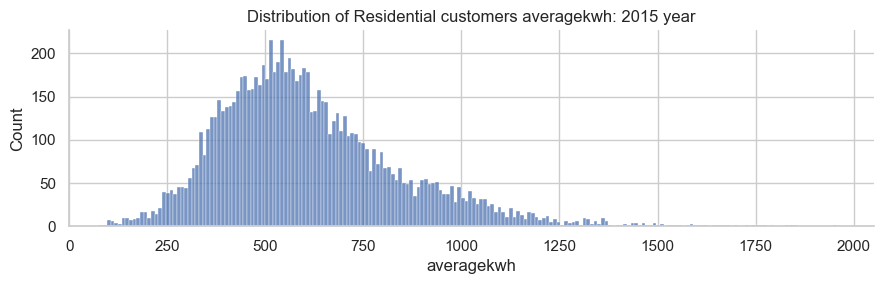

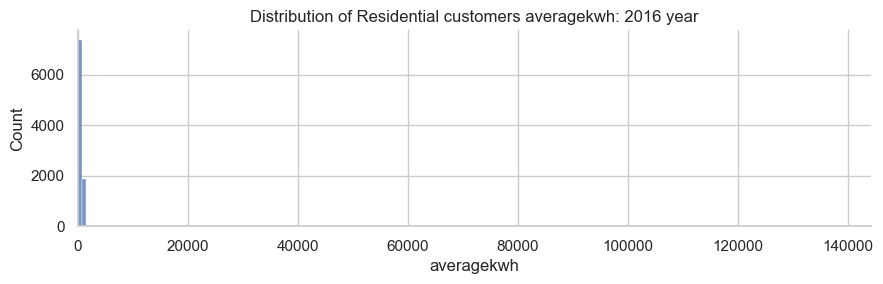

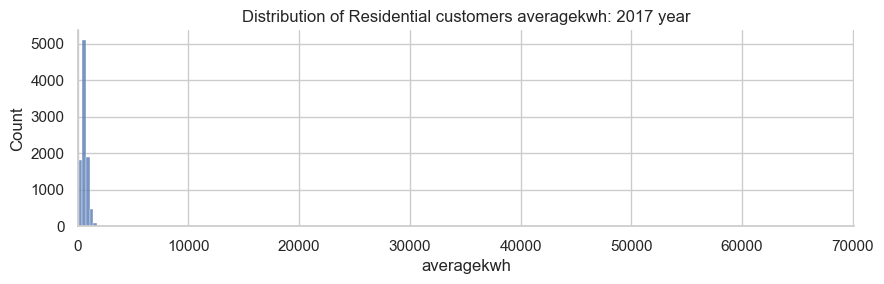

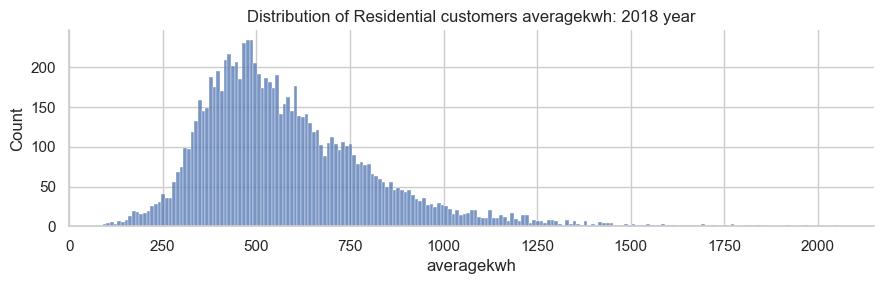

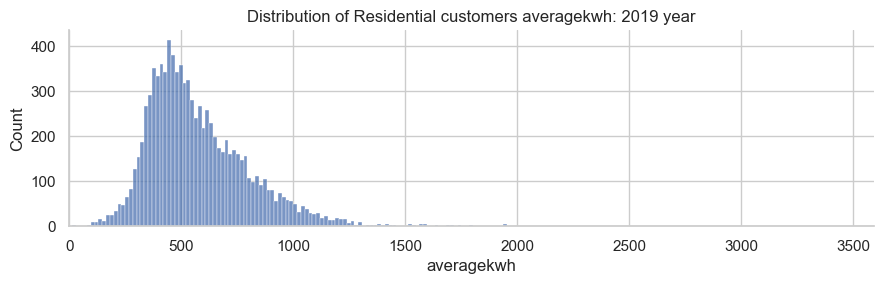

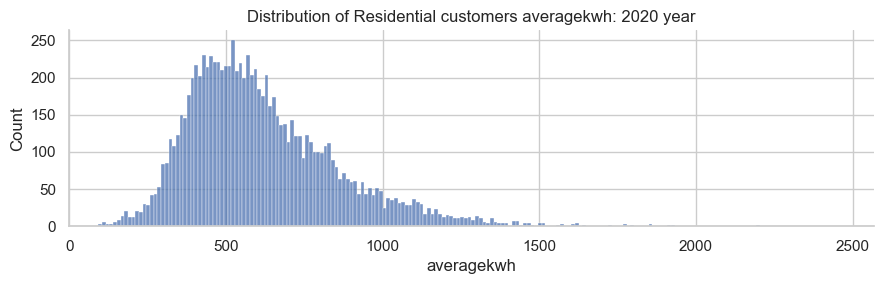

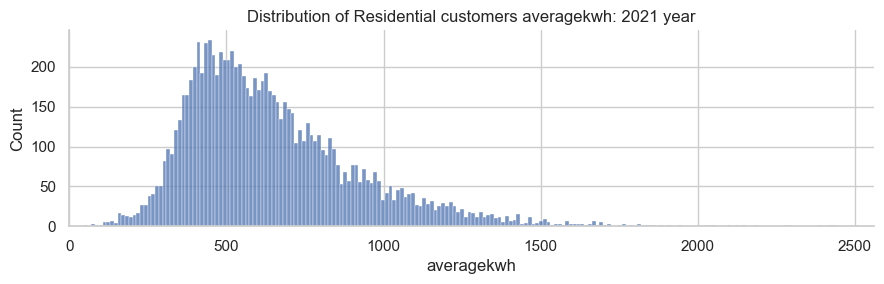

In [49]:
viz('Elec- Residential','averagekwh')

In [ ]:
viz('Elec- Commercial','totalcustomers')

In [ ]:
viz('Elec- Industrial','totalcustomers')

In [ ]:
viz('Elec- Agricultural','totalcustomers')

In [ ]:
viz_med('totalcustomers',year=2015)

In [ ]:
viz('Elec- Residential','totalkwh')

## Distribution of Monthly Average Consumption by years and customer classess

In [55]:
def viz_med(parameter,year=None):
    if year: # if year is given
        grouped_data = df_years[df_years['year'] == year].groupby(['year', 'customerclass'])[parameter].sum().reset_index()
        title = f'Median Number of {parameter} per Customer Class for {year}'
    else:
        grouped_data = df_years.groupby(['year', 'customerclass'])[parameter].median().reset_index()
        title = f'Annual Median Number of {parameter} per Customer Class'
    # Set the seaborn style
    sns.set(style='whitegrid')
    labels=['Residential', 'Commercial', 'Agricultural', 'Industrial']
    color_palette = sns.color_palette("flare", len(grouped_data['year'].unique()))

    # Plot the bar chart
    ax = sns.barplot(x='customerclass', y=parameter, hue='year', palette=color_palette,data=grouped_data,order=['Elec- Residential','Elec- Commercial','Elec- Agricultural',  'Elec- Industrial'])

    ax.set_xticklabels(labels)

    # Add labels and title
    plt.xlabel('Customer Class')
    plt.ylabel(f'Median Number of {parameter}')
    plt.title(title)

    plt.show()

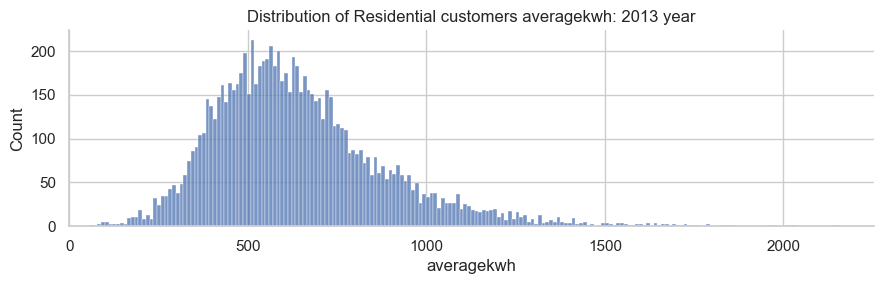

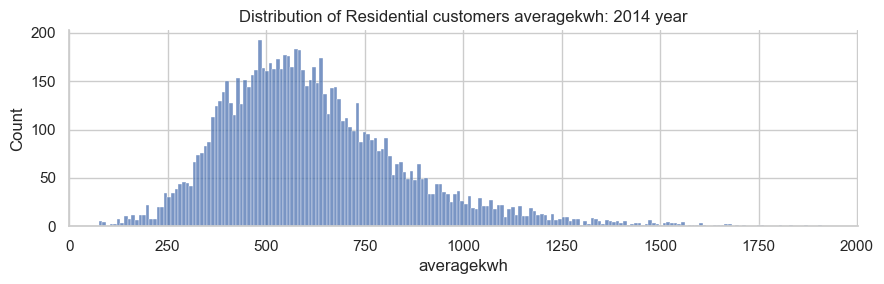

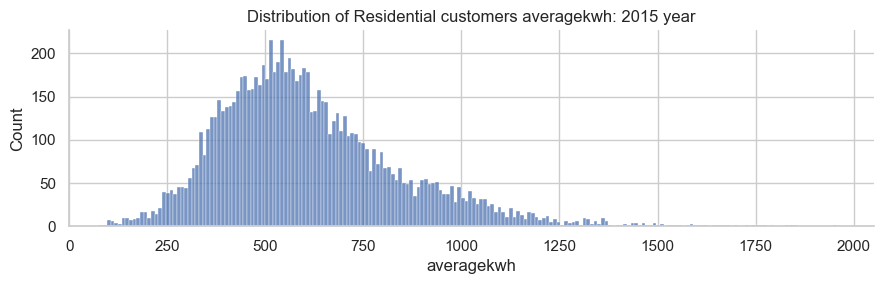

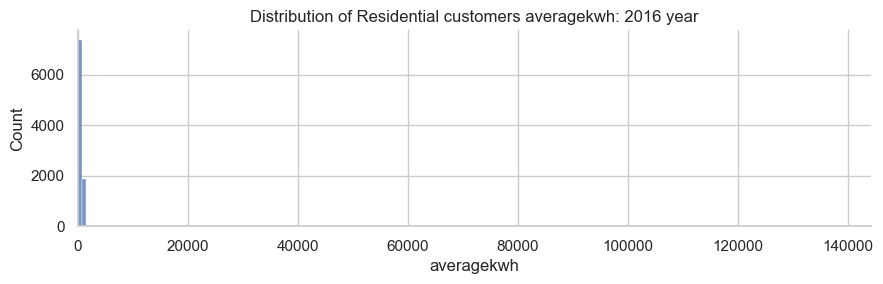

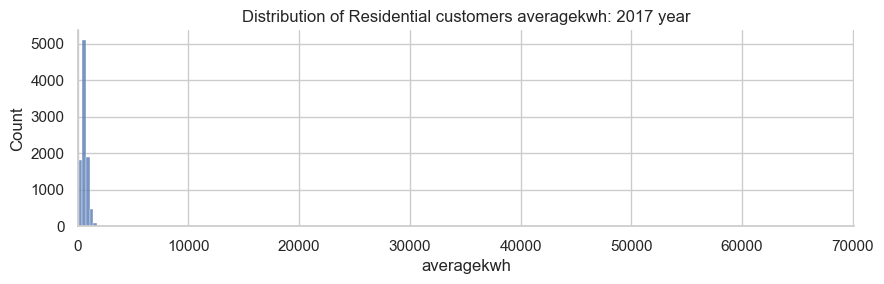

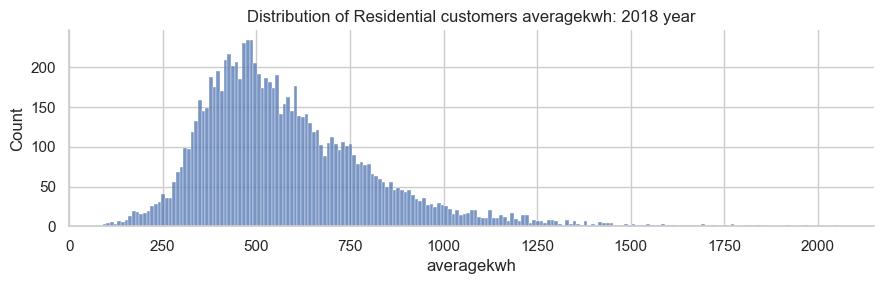

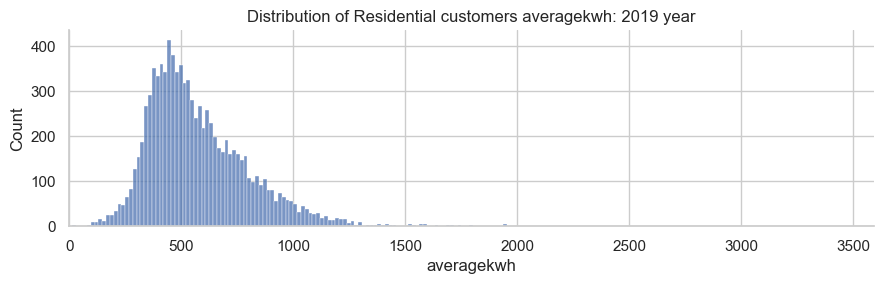

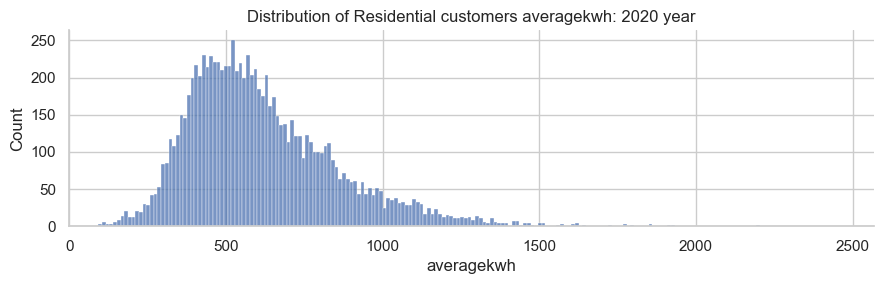

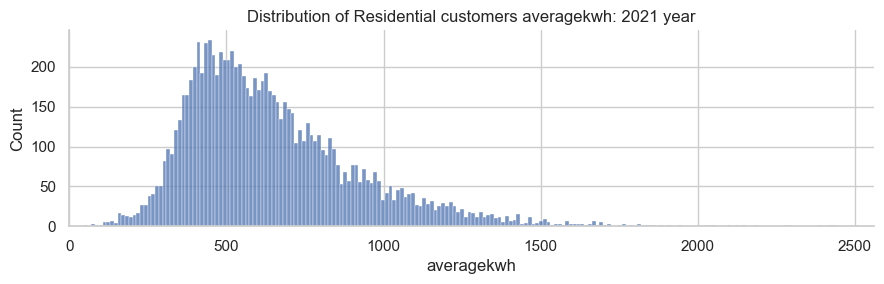

In [48]:
viz('Elec- Residential','averagekwh')

In [ ]:
viz('Elec- Commercial','averagekwh')

In [ ]:
viz('Elec- Industrial','averagekwh')

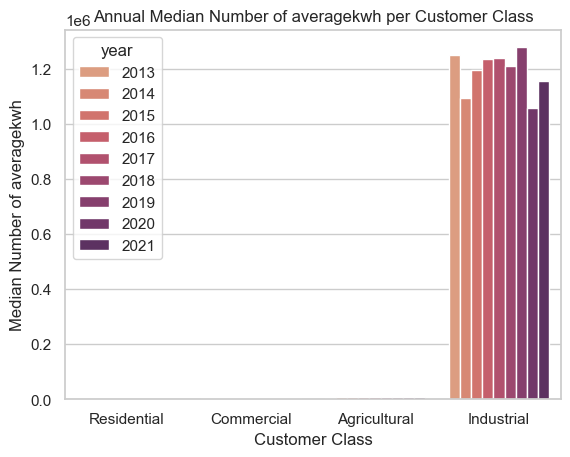

In [56]:
viz_med('averagekwh') #  industrial customers consumer a lot of kwh thats why the scale is in 10**6 units

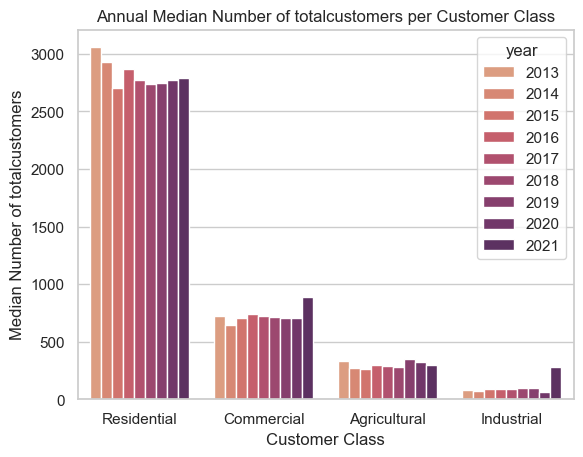

In [59]:
viz_med('totalcustomers') #  industrial customers consumer a lot of kwh thats why the scale is in 10**6 units

In [ ]:
# lets graph median average kilowatt hours consumption wihout industrial clients
df_years_noind=df_years[df_years['customerclass']!='Elec- Industrial']
grouped_data = df_years.groupby(['year', 'customerclass'])['averagekwh'].median().reset_index()

# Set the seaborn style
sns.set(style='whitegrid')
labels=['Residential', 'Commercial', 'Agricultural']
color_palette = sns.color_palette("flare", len(grouped_data['year'].unique()))

# Plot the bar chart
ax = sns.barplot(x='customerclass', y='averagekwh', hue='year', palette=color_palette,data=grouped_data,order=['Elec- Residential','Elec- Commercial','Elec- Agricultural'])

ax.set_xticklabels(labels)

# Add labels and title
plt.xlabel('Customer Class')
plt.ylabel('Number of Customers')
plt.title('Annual Median Average kwh consumption per Customer Class')

plt.show()
# we see that residential customers consumer quite similar amount of kwh every year
# while there has been an increase in consumption in 2021 for Agricultural and Commercial Custoemrs

## Monthly and Yearly Trends Analysis

In [50]:
# Lets explore if there is any seasonality in energy consumption 
# by plotting consumption over months

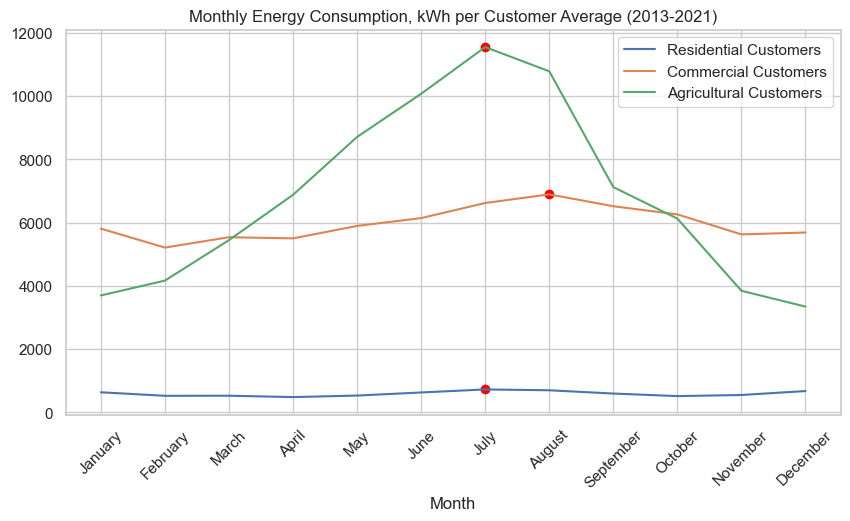

In [51]:
import calendar

grouped_data = df_years.groupby(['customerclass', 'month']).agg({'averagekwh': 'median'})
# I use median as it's more robust to outliers as compared to average
grouped_data = grouped_data.reset_index()

# use all customer classes but industrial for which the consumption is very high and which we will plot separately
customer_classes = ['Elec- Residential','Elec- Commercial','Elec- Agricultural']
customer_class_labels = ['Residential Customers', 'Commercial Customers', 'Agricultural Customers']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Iterate over each unique customer class and plot a line
for i,customer_class in enumerate(customer_classes):
    # Select data for the current customer class
    data = grouped_data[grouped_data['customerclass'] == customer_class]
    
    # Find the maximum average consumption (averagejwh) point in the data for the current customer class
    highest_point = data[data['averagekwh'] == data['averagekwh'].max()]
    
    # Plot the line for the current customer class
    ax.plot(data['month'], data['averagekwh'], label=customer_class_labels[i])
    
    # Plot a marker at the highest point
    ax.scatter(highest_point['month'], highest_point['averagekwh'], marker='o', color='red')
    
    # Customize x-axis labels with month names
    ax.set_xticks(data['month'])
    ax.set_xticklabels([calendar.month_name[m] for m in data['month']], rotation=45)

# Customize the plot labels and title
ax.set_xlabel("Month")
#ax.set_ylabel("Median of Average Kilowatt per hour energy consumption")
ax.set_title("Monthly Energy Consumption, kWh per Customer Average (2013-2021)")
ax.legend()
plt.show()
# looks like summer months - July & August are peak months 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


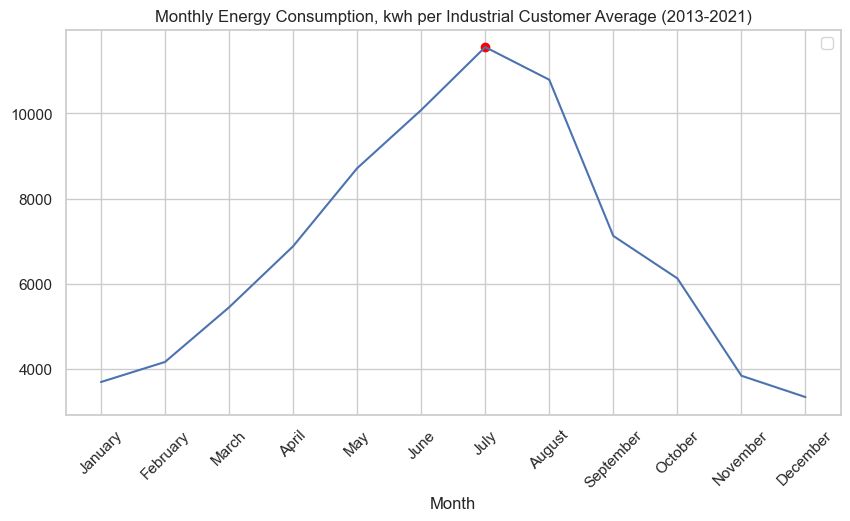

In [52]:
# plotting industrial customers
grouped_data = df_years.groupby(['customerclass', 'month']).agg({'averagekwh': 'median'})
# I use median as it's more robust to outliers as compared to average
grouped_data = grouped_data.reset_index()

# use all customer classes but industrial for which the consumption is very high and which we will plot separately
customer_classes = ['Elec- Industrial']
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))
# Select data for the current customer class
data = grouped_data[grouped_data['customerclass'] == customer_class]
# Find the maximum average consumption (averagejwh) point 
highest_point = data[data['averagekwh'] == data['averagekwh'].max()]
ax.plot(data['month'], data['averagekwh'])
   
# Plot a marker at the highest point
ax.scatter(highest_point['month'], highest_point['averagekwh'], marker='o', color='red')
    
# Customize x-axis labels with month names
ax.set_xticks(data['month'])
ax.set_xticklabels([calendar.month_name[m] for m in data['month']], rotation=45)

# Customize the plot labels and title
ax.set_xlabel("Month")
#ax.set_ylabel("Median of Average Kilowatt per hour energy consumption")
ax.set_title("Monthly Energy Consumption, kwh per Industrial Customer Average (2013-2021)")
ax.ticklabel_format(style='plain', axis='y')

ax.legend()
plt.show()
# July is a peak month for industrial customers

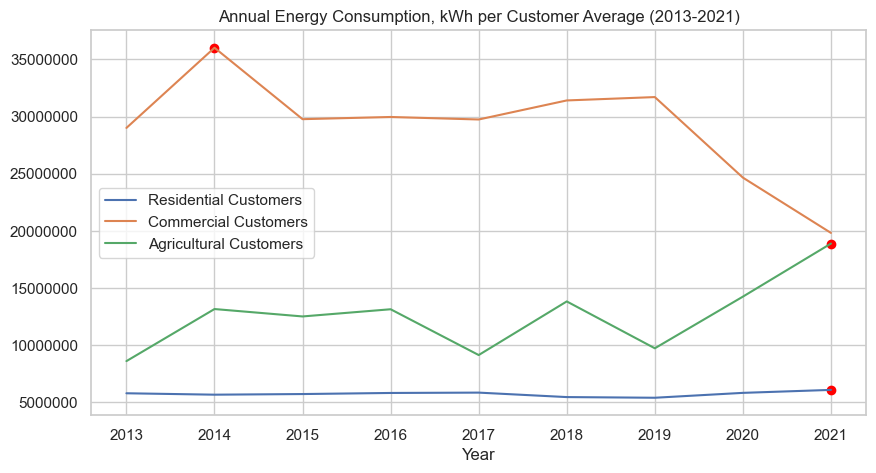

In [53]:
# now lets see how consumption changed over the years i.e. time-series trends

import calendar

grouped_data = df_years.groupby(['customerclass', 'year']).agg({'averagekwh': 'sum'})
# I use median as it's more robust to outliers as compared to average
grouped_data = grouped_data.reset_index()

# use all customer classes but industrial for which the consumption is very high and which we will plot separately
customer_classes = ['Elec- Residential','Elec- Commercial','Elec- Agricultural']
customer_class_labels = ['Residential Customers', 'Commercial Customers', 'Agricultural Customers']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))

# Iterate over each unique customer class and plot a line
for i,customer_class in enumerate(customer_classes):
    # Select data for the current customer class
    data = grouped_data[grouped_data['customerclass'] == customer_class]
    
    # Find the maximum average consumption (averagejwh) point in the data for the current customer class
    highest_point = data[data['averagekwh'] == data['averagekwh'].max()]
    
    # Plot the line for the current customer class
    ax.plot(data['year'], data['averagekwh'], label=customer_class_labels[i])
    
    # Plot a marker at the highest point
    ax.scatter(highest_point['year'], highest_point['averagekwh'], marker='o', color='red')
    
    # Customize the plot labels and title
ax.set_xlabel("Year")
#ax.set_ylabel("Median of Average Kilowatt per hour energy consumption")
ax.set_title("Annual Energy Consumption, kWh per Customer Average (2013-2021)")
ax.ticklabel_format(style='plain', axis='y')

ax.legend()
plt.show()
# Residential and Agricultural customers consumed the most energy in 2021 over the last 8 years 
# while it's the opposite for Commercial Clients who consumed the least amount of energy in 2021


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


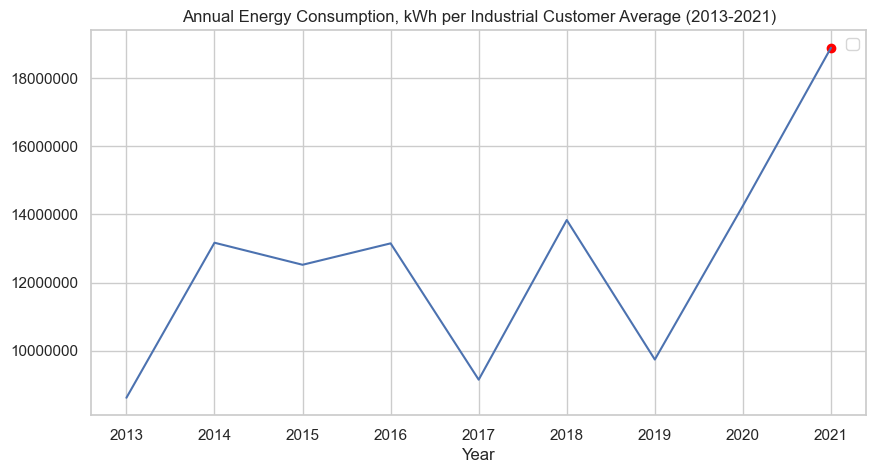

In [54]:
# now lets see how consumption changed over the years for industrial customers

grouped_data = df_years.groupby(['customerclass', 'year']).agg({'averagekwh': 'sum'})
# I use median as it's more robust to outliers as compared to average
grouped_data = grouped_data.reset_index()
customer_classes = ['Elec- Industrial']
customer_class_labels = ['Industrial Customers']

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 5))
data = grouped_data[grouped_data['customerclass'] == customer_class]
    
# Find the maximum average consumption (averagejwh) point 
highest_point = data[data['averagekwh'] == data['averagekwh'].max()]
    
ax.plot(data['year'], data['averagekwh'])
    
# Plot a marker at the highest point
ax.scatter(highest_point['year'], highest_point['averagekwh'], marker='o', color='red')
    
# Customize the plot labels and title
ax.set_xlabel("Year")
#ax.set_ylabel("Median of Average Kilowatt per hour energy consumption")
ax.set_title("Annual Energy Consumption, kWh per Industrial Customer Average (2013-2021)")
ax.ticklabel_format(style='plain', axis='y')

ax.legend()
plt.show()
# Residential and Agricultural customers consumed the most energy in 2021 over the last 9 years 
# while it's the opposite for Commercial Clients who consumed the least amount of energy in 2021
